# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Terrible overall, medium ser..."
1,✅ Trip Verified | London Heathrow to Male In...
2,Not Verified | Very good flight following an ...
3,Not Verified | An hour's delay due to late ar...
4,✅ Trip Verified | I booked through BA becaus...


In [4]:
import os  # Import the os module to interact with the operating system

# Create the 'data' directory if it does not exist
if not os.path.exists('data'):
    os.makedirs('data')  # Create the directory
# Now you can save the DataFrame to the CSV file
df.to_csv("data/BA_reviews.csv")  # Save the DataFrame to the specified path

In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
pip install pandas numpy # installing required libraries 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [8]:
import pandas as pd
import numpy as np

In [97]:

# Load the dataset
df = pd.read_csv("data/BA_reviews.csv")

# Remove "✅ Trip Verified" from the reviews
df["reviews"] = df["reviews"].str.replace(" Trip Verified", "", regex=True)

# Save the cleaned data
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

print("✅ 'Trip Verified' removed successfully!")


✅ 'Trip Verified' removed successfully!


In [99]:
df  = pd.read_csv("data/BA_reviews.csv") # loading dataset 

In [101]:
print(df.head())

   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified | Terrible overall, medium ser...
1           1  ✅ Trip Verified |   London Heathrow to Male In...
2           2  Not Verified |  Very good flight following an ...
3           3  Not Verified |  An hour's delay due to late ar...
4           4  ✅ Trip Verified |   I booked through BA becaus...


In [103]:
print(df.isnull().sum) #counting missing values

<bound method DataFrame.sum of      Unnamed: 0  reviews
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
..          ...      ...
995       False    False
996       False    False
997       False    False
998       False    False
999       False    False

[1000 rows x 2 columns]>


In [12]:
# Found no missingvalues

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
print(df.describe())
print(df.info())

        Unnamed: 0
count  1000.000000
mean    499.500000
std     288.819436
min       0.000000
25%     249.750000
50%     499.500000
75%     749.250000
max     999.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [15]:
# Check word count in each review
df["review_length"] = df["reviews"].apply(lambda x: len(str(x).split()))

# Get basic statistics on review length
print(df["review_length"].describe())
# This gives an idea of review length distribution

count    1000.000000
mean      158.760000
std       111.786111
min        27.000000
25%        79.000000
50%       127.000000
75%       201.250000
max       643.000000
Name: review_length, dtype: float64


In [16]:
df.sample(5)

,Unnamed: 0,reviews,review_length
690,690,✅ Trip Verified | British Airways is taking re...,67
660,660,Not Verified | Having just booked BA for a ret...,58
443,443,✅ Trip Verified | Not only my first flight in...,224
918,918,Not Verified | Gatwick to Venice. We have flo...,93
298,298,✅ Trip Verified | Couldn’t book in online. Ar...,72


In [17]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("pukt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\creat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading pukt: Package 'pukt' not found in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\creat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# Initialize stopwords & lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize & remove stopwords
    return " ".join(words)


In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\creat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\creat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df["cleaned_reviews"] = df["reviews"].apply(clean_text)
df[["reviews", "cleaned_reviews"]].head()

,reviews,cleaned_reviews
0,"✅ Trip Verified | Terrible overall, medium ser...",✅ trip verified terrible overall medium servic...
1,✅ Trip Verified | London Heathrow to Male In...,✅ trip verified london heathrow male new busin...
2,Not Verified | Very good flight following an ...,verified good flight following equally good fl...
3,Not Verified | An hour's delay due to late ar...,verified hour delay due late arrival incoming ...
4,✅ Trip Verified | I booked through BA becaus...,✅ trip verified booked ba loganair ’ represent...


In [22]:
from collections import Counter

# Flatten all words into a single list
all_words = " ".join(df["cleaned_reviews"]).split()
word_freq = Counter(all_words)

# Show top 10 most common words
print(word_freq.most_common(10))


[('flight', 2283), ('ba', 1402), ('verified', 1003), ('trip', 866), ('seat', 825), ('service', 784), ('✅', 739), ('time', 665), ('’', 627), ('hour', 616)]


In [23]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER for sentiment analysis
nltk.download("vader_lexicon")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\creat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_vader(text):
    score = sia.polarity_scores(str(text))
    return "Positive" if score["compound"] > 0.05 else "Negative" if score["compound"] < -0.05 else "Neutral"

# Apply sentiment analysis
df["Sentiment_VADER"] = df["cleaned_reviews"].apply(get_sentiment_vader)

# Show results
df[["cleaned_reviews", "Sentiment_VADER"]].head()


,cleaned_reviews,Sentiment_VADER
0,✅ trip verified terrible overall medium servic...,Negative
1,✅ trip verified london heathrow male new busin...,Positive
2,verified good flight following equally good fl...,Positive
3,verified hour delay due late arrival incoming ...,Positive
4,✅ trip verified booked ba loganair ’ represent...,Positive


In [25]:
# Function to get polarity score
def get_sentiment_textblob(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply TextBlob sentiment analysis
df["Sentiment_TextBlob"] = df["cleaned_reviews"].apply(get_sentiment_textblob)

# Convert polarity to sentiment labels
df["Sentiment_TextBlob_Label"] = df["Sentiment_TextBlob"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

# Show results
df[["cleaned_reviews", "Sentiment_TextBlob_Label"]].head()


,cleaned_reviews,Sentiment_TextBlob_Label
0,✅ trip verified terrible overall medium servic...,Negative
1,✅ trip verified london heathrow male new busin...,Positive
2,verified good flight following equally good fl...,Positive
3,verified hour delay due late arrival incoming ...,Positive
4,✅ trip verified booked ba loganair ’ represent...,Positive


In [26]:
# Check sentiment distribution
print(df["Sentiment_VADER"].value_counts())
print(df["Sentiment_TextBlob_Label"].value_counts())


Sentiment_VADER
Positive    540
Negative    439
Neutral      21
Name: count, dtype: int64
Sentiment_TextBlob_Label
Positive    620
Negative    362
Neutral      18
Name: count, dtype: int64


C:\Users\creat\AppData\Local\Temp\ipykernel_9508\1188848420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment_VADER"], palette="coolwarm")


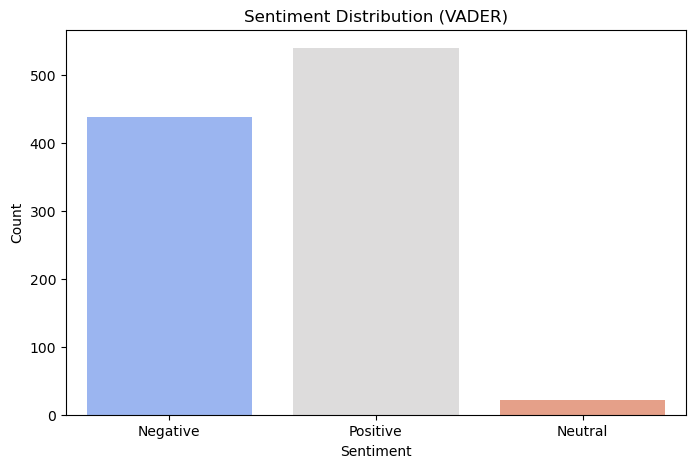

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Sentiment_VADER"], palette="coolwarm")
plt.title("Sentiment Distribution (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


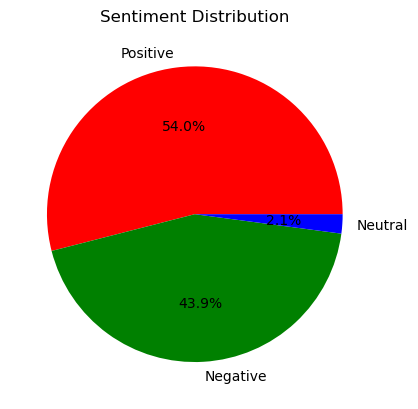

In [28]:
df["Sentiment_VADER"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["red", "green", "blue"])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


In [29]:
pip install -U pyLDAvis


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
import gensim
import gensim.corpora as corpora
from nltk.tokenize import word_tokenize
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [31]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\creat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# Tokenize the cleaned reviews
df["tokenized_reviews"] = df["cleaned_reviews"].apply(lambda x: word_tokenize(str(x)))

# Create Dictionary & Corpus
dictionary = Dictionary(df["tokenized_reviews"])
corpus = [dictionary.doc2bow(text) for text in df["tokenized_reviews"]]

print(f"Dictionary Size: {len(dictionary)} words")
print(f"Corpus Size: {len(corpus)} reviews")


Dictionary Size: 6897 words
Corpus Size: 1000 reviews


In [33]:
# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, passes=10, random_state=42)

# Print topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.029*"flight" + 0.016*"ba" + 0.011*"verified" + 0.011*"service" + 0.010*"trip" + 0.009*"seat" + 0.009*"hour" + 0.009*"time" + 0.008*"✅" + 0.006*"boarding"')
(1, '0.021*"flight" + 0.017*"ba" + 0.017*"seat" + 0.013*"verified" + 0.012*"trip" + 0.011*"✅" + 0.010*"crew" + 0.010*"good" + 0.010*"food" + 0.010*"class"')
(2, '0.031*"flight" + 0.016*"ba" + 0.011*"verified" + 0.010*"’" + 0.009*"customer" + 0.009*"hour" + 0.009*"u" + 0.008*"trip" + 0.008*"british" + 0.008*"service"')
(3, '0.008*"’" + 0.007*"class" + 0.006*"food" + 0.005*"ba" + 0.005*"seat" + 0.005*"verified" + 0.005*"british" + 0.005*"business" + 0.004*"first" + 0.004*"service"')


In [34]:
# Visualize LDA results
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


In [35]:
df["Sentiment_VADER"].value_counts()


Sentiment_VADER
Positive    540
Negative    439
Neutral      21
Name: count, dtype: int64

In [36]:
negative_reviews = df[df["Sentiment_VADER"] == "Negative"]["cleaned_reviews"]

In [37]:
positive_reviews = df[df["Sentiment_VADER"] == "Positive"]["cleaned_reviews"]

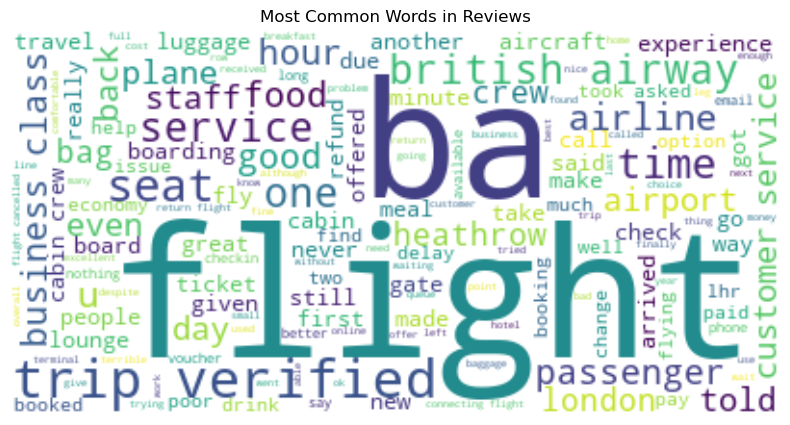

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = " ".join(df["cleaned_reviews"])
wordcloud = WordCloud(background_color="white").generate(all_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()
